In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2020-08-08 20:50:50--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2020-08-08 20:50:51 (34.9 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.5MB/s 
     |████████████████████████████████| 2.1MB 35.1MB/s 
     |████████████████████████████████| 8.7MB 35.9MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df['LogPassengers'] = np.log(df['Passengers'])

In [ ]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(1,1,1,12) [intercept=True]; AIC=907.575, BIC=929.875, Time=3.525 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=1022.234, BIC=1027.809, Time=0.025 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=906.857, BIC=918.007, Time=0.624 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=963.555, BIC=974.705, Time=0.584 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=1192.711, BIC=1195.499, Time=0.021 seconds
Fit ARIMA(1,0,0)x(0,1,0,12) [intercept=True]; AIC=907.180, BIC=915.542, Time=0.114 seconds
Fit ARIMA(1,0,0)x(2,1,0,12) [intercept=True]; AIC=908.543, BIC=922.480, Time=1.990 seconds
Fit ARIMA(1,0,0)x(1,1,1,12) [intercept=True]; AIC=907.563, BIC=921.500, Time=1.784 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(1,0,0)x(0,1,1,12) [intercept=True]; AIC=907.120, BIC=91

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Thu, 30 Jul 2020   AIC                            905.686
Time:                                    18:37:54   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (Q):                       37.41   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.59   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

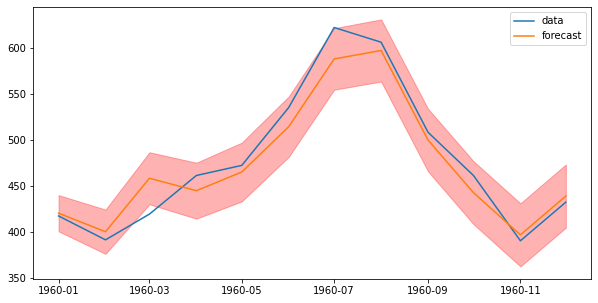

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

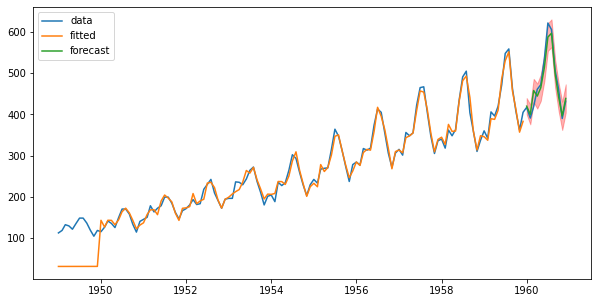

In [ ]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [ ]:
logmodel = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(1,1,1,12) [intercept=True]; AIC=-440.115, BIC=-417.815, Time=3.858 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=-317.949, BIC=-312.374, Time=0.120 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=-433.027, BIC=-421.877, Time=1.641 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=-383.189, BIC=-372.039, Time=0.980 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=-134.983, BIC=-132.196, Time=0.028 seconds
Fit ARIMA(2,0,2)x(0,1,1,12) [intercept=True]; AIC=-444.326, BIC=-424.814, Time=3.325 seconds
Fit ARIMA(2,0,2)x(0,1,0,12) [intercept=True]; AIC=-414.782, BIC=-398.057, Time=1.016 seconds
Fit ARIMA(2,0,2)x(0,1,2,12) [intercept=True]; AIC=-442.328, BIC=-420.028, Time=13.339 seconds
Fit ARIMA(2,0,2)x(1,1,0,12) [intercept=True]; AIC=-436.712, BIC=-417.200, Time=2.936 seconds
Fit ARIMA(2,0,2)x(1,1,2,12) [intercept=True]; AIC=-433.055, BIC=-407.968, Time=7.827 seconds
Near non-invertible roots

In [ ]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Thu, 30 Jul 2020   AIC                           -448.052
Time:                                      18:45:17   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.156      0.031       0.002       0.037
ar.L1          0.6002      0.083      7.269      0.000       0.438       0.762
ar.L2          0.2415      0.085      2.850      0.004       0.075       0.408
ma.S.L12      -0.5673      0.105     -5.418      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.190      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                       36.66   Jarque-Bera (JB):                 6.09
Prob(Q):                              0.62   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

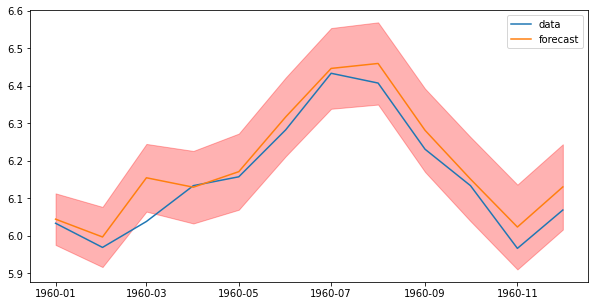

In [ ]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

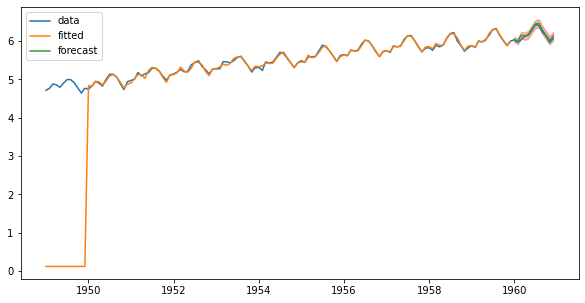

In [ ]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [ ]:
### forecast RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))

In [ ]:
print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.536468837448087
Logged RMSE: 23.04512598173903


In [ ]:
### non-seasonal
model = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      d=0,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-211.983, BIC=-206.232, Time=0.034 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-216.493, BIC=-207.868, Time=0.074 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=-229.510, BIC=-218.009, Time=0.291 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-214.718, BIC=-206.092, Time=0.063 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-221.069, BIC=-209.568, Time=0.177 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-242.045, BIC=-227.669, Time=0.459 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=-216.622, BIC=-205.121, Time=0.080 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-246.512, BIC=-232.136, Time=0.409 seconds
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=-240.500, BIC=-223.249, Time=0.426 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=-216.024, BIC=-201.648, Time=0.115 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=-246.383, BIC=-229.131, Time=0.

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 227.223
Date:                Thu, 30 Jul 2020   AIC                           -424.445
Time:                        18:58:24   BIC                           -381.317
Sample:                             0   HQIC                          -406.920
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0068      0.006      1.153      0.249      -0.005       0.018
ar.L1          0.0201      0.090      0.222      0.824      -0.157       0.197
ar.L2         -0.0915      0.069     -1.330      0.183      -0.226       0.043
ar.L3         -0.0208      0.068     -0.304      0.761      -0.155       0.113
ar.L4         -0.1186      0.074     -1.607      0.108      -0.263       0.026
ar.L5         -0.0090      0.067     -0.135      0.893      -0.140       0.122
ar.L6         -0.0714      0.069     -1.032      0.302      -0.207       0.064
ar.L7         -0.0333      0.073     -0.454      0.650      -0.177       0.110
ar.L8         -0.1180      0.066     -1.786      0.074      -0.247       0.011
ar.L9         -0.0140      0.080     -0.175      0.861      -0.171       0.143
ar.L10        -0.0824      0.066     -1.246      0.213      -0.212       0.047
ar.L11         0.0113      0.073      0.155      0.877      -0.131       0.154
ar.L12         0.7983      0.063     12.729      0.000       0.675       0.921
ma.L1         -0.3741      0.126     -2.975      0.003      -0.621      -0.128
sigma2         0.0016      0.000      6.989      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                       54.70   Jarque-Bera (JB):                 2.71
Prob(Q):                              0.06   Prob(JB):                         0.26
Heteroskedasticity (H):               0.35   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

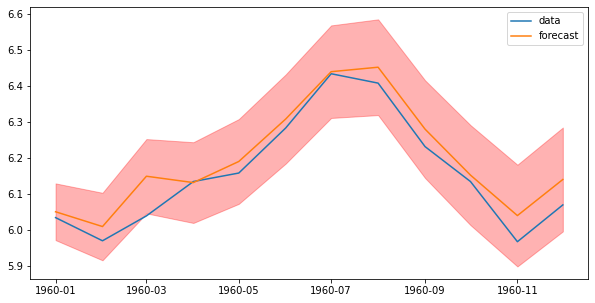

In [ ]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

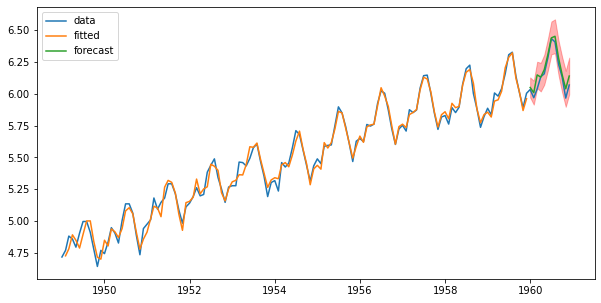

In [ ]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [ ]:
rmse(test['Passengers'], np.exp(test_pred))

23.156042981812437

In [ ]:
### non-seasonal non-logged
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1239.972, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1230.301, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.42 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1261.216, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1230.831, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1226.363, Time=0.44 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1254.439, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1245.588, Time=0.43 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1221.236, Time=0.61 sec
 ARIMA(5,1

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 2)   Log Likelihood                -494.031
Date:                Sat, 08 Aug 2020   AIC                           1020.062
Time:                        20:51:44   BIC                           1066.065
Sample:                             0   HQIC                          1038.755
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1064      3.023      2.020      0.043       0.182      12.031
ar.L1         -0.0765      0.143     -0.535      0.593      -0.357       0.204
ar.L2         -0.2995      0.142     -2.114      0.035      -0.577      -0.022
ar.L3         -0.1339      0.117     -1.147      0.251      -0.363       0.095
ar.L4         -0.2845      0.115     -2.483      0.013      -0.509      -0.060
ar.L5         -0.0918      0.116     -0.790      0.430      -0.320       0.136
ar.L6         -0.3054      0.112     -2.717      0.007      -0.526      -0.085
ar.L7         -0.1005      0.124     -0.813      0.416      -0.343       0.142
ar.L8         -0.3148      0.120     -2.624      0.009      -0.550      -0.080
ar.L9         -0.0835      0.120     -0.695      0.487      -0.319       0.152
ar.L10        -0.3180      0.129     -2.471      0.013      -0.570      -0.066
ar.L11        -0.0755      0.130     -0.582      0.560      -0.330       0.179
ar.L12         0.6365      0.126      5.057      0.000       0.390       0.883
ma.L1         -0.0962      0.157     -0.611      0.541      -0.405       0.212
ma.L2          0.2347      0.185      1.267      0.205      -0.128       0.598
sigma2        97.8857     15.341      6.381      0.000      67.818     127.954
===================================================================================
Ljung-Box (Q):                       37.22   Jarque-Bera (JB):                13.05
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.19
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

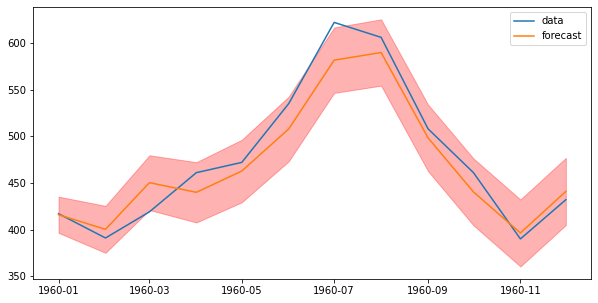

In [ ]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [ ]:
rmse(test['Passengers'], test_pred)

20.15224382134019